In [10]:
pip install matplotlib pandas

Note: you may need to restart the kernel to use updated packages.


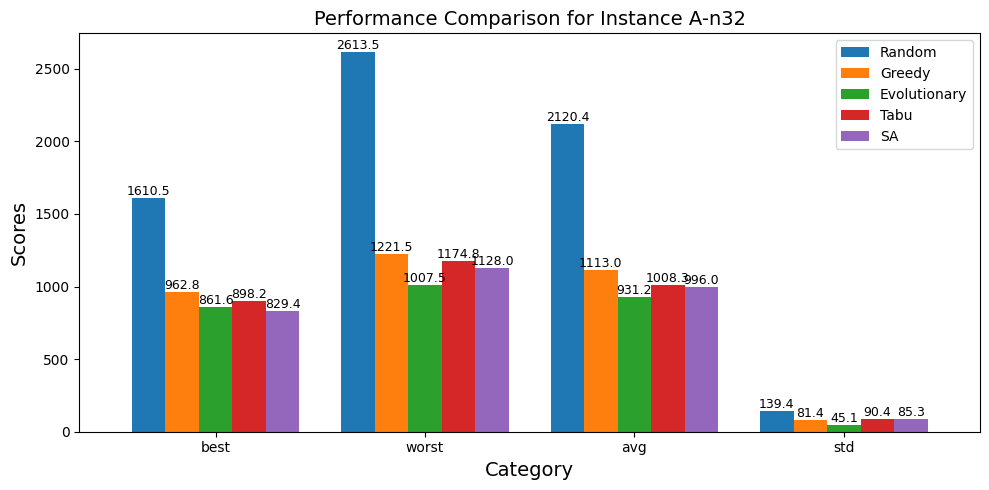

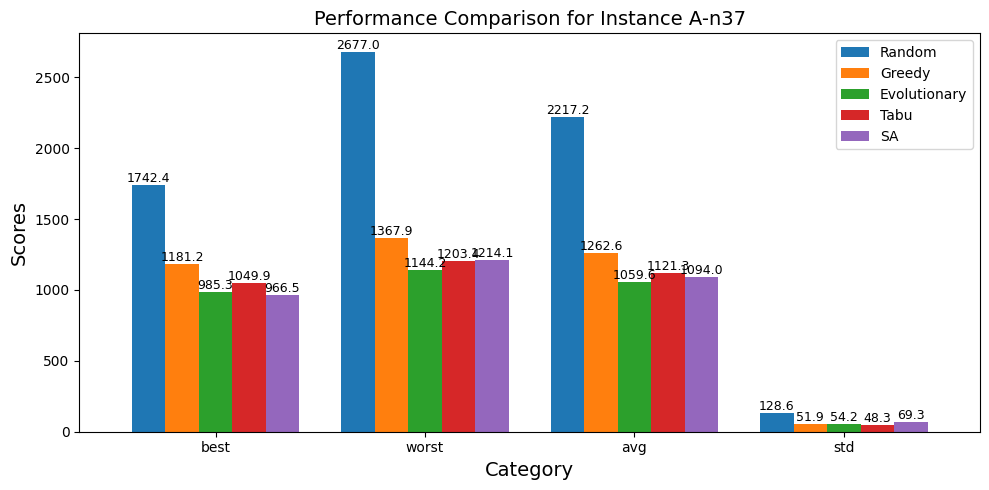

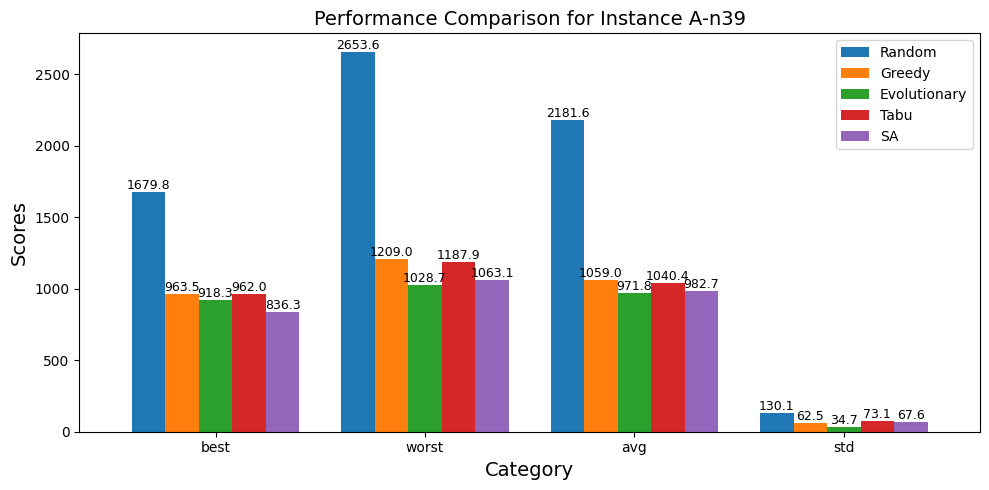

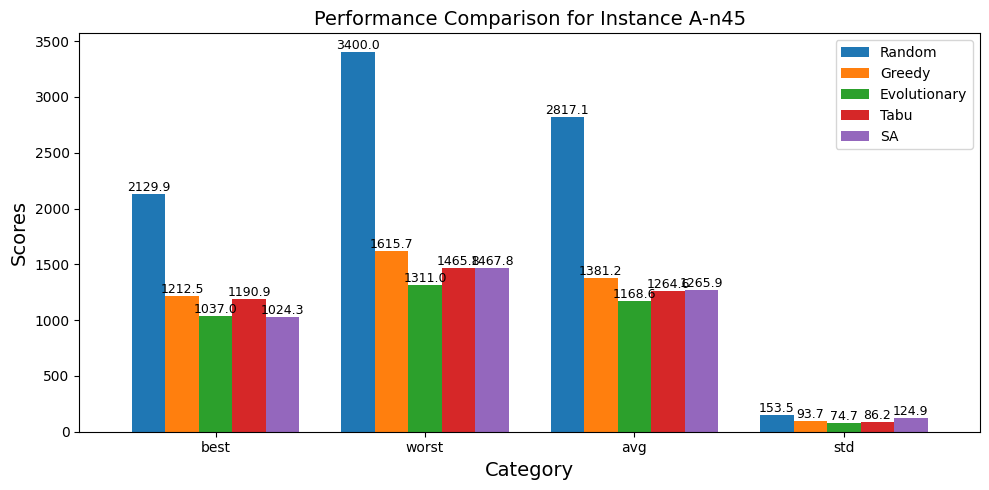

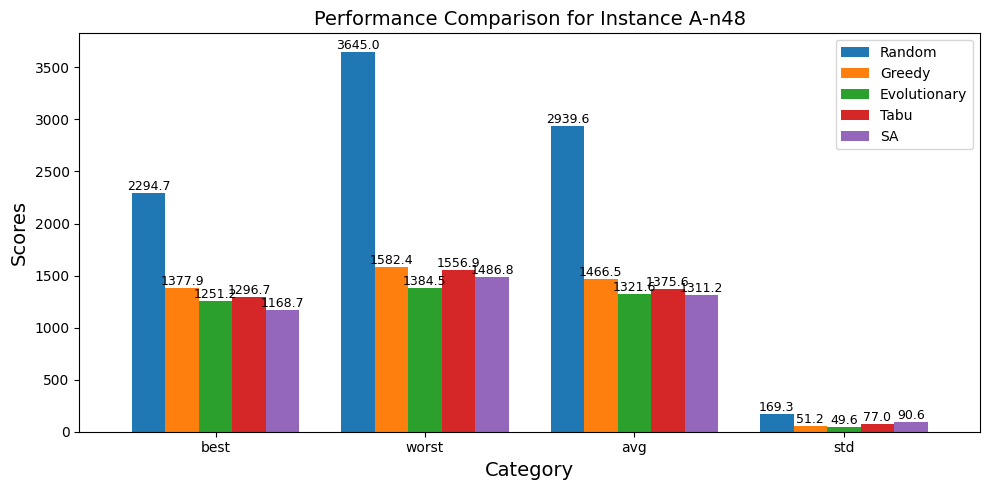

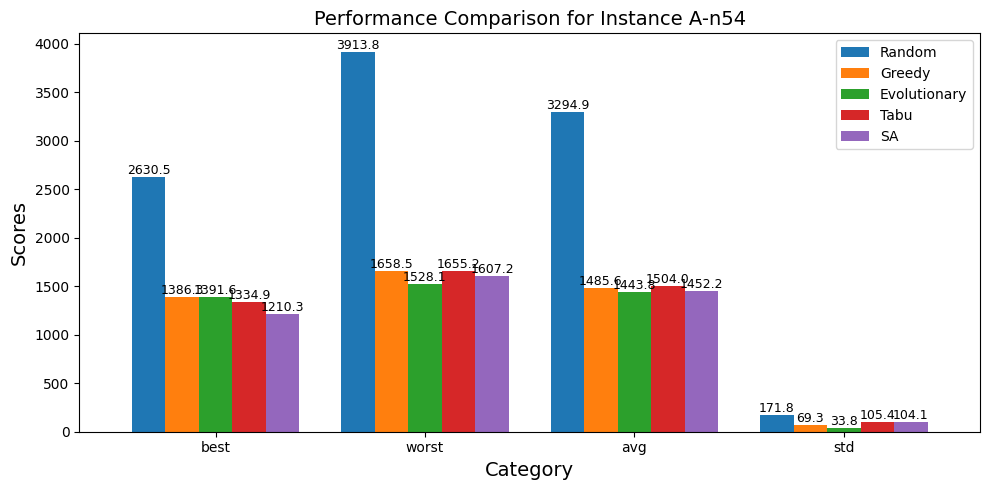

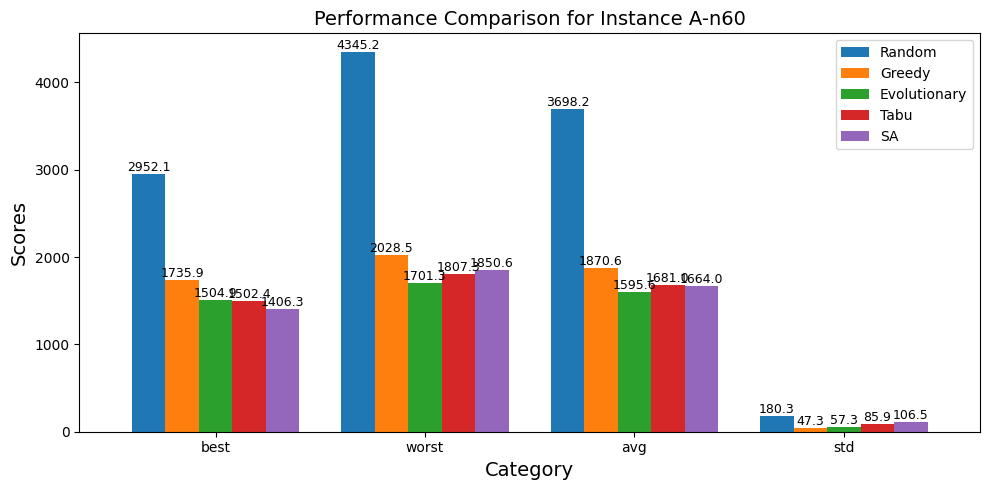

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from a CSV file
df = pd.read_csv('comparisons-sa.csv', sep=";")

# Set the instance number as the index
df.set_index('Instance', inplace=True)

# Define algorithms and their corresponding metrics
algorithms = ['Random', 'Greedy', 'Evolutionary', 'Tabu', 'SA']
metrics = ['best', 'worst', 'avg', 'std']

# Loop through each instance and create a separate chart
for index, row in df.iterrows():
    # Prepare data for the current instance
    plot_data = {}
    
    # Group results by algorithm for the current row
    for algo in algorithms:
        algo_data = {}
        for metric in metrics:
            column_name = f"{algo}: {metric}"
            algo_data[metric] = row[column_name]
        plot_data[algo] = algo_data

    # Convert to DataFrame for easier plotting
    plot_df = pd.DataFrame(plot_data)

    # Create a bar plot
    ax = plot_df.plot(kind='bar', figsize=(10, 5), width=0.8)

    # Customize the plot
    ax.set_title(f'Performance Comparison for Instance {index.split("/")[-1][:-3]}', fontsize=14)
    ax.set_ylabel('Scores', fontsize=14)
    ax.set_xlabel('Category', fontsize=14)
    plt.xticks(rotation=0)

    # Show the values on top of the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=9)

    # Show the plot
    plt.tight_layout()
    plt.show()

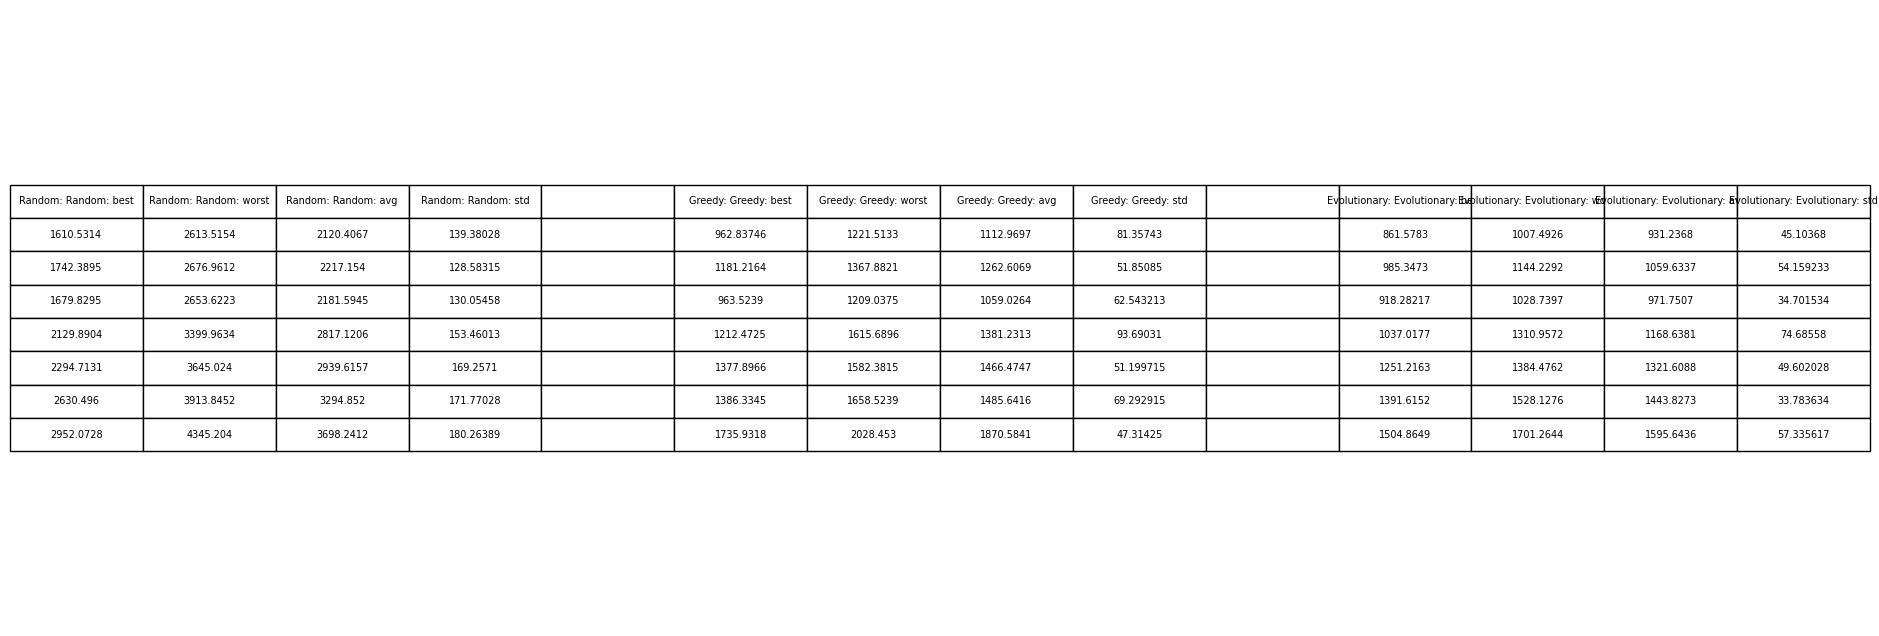

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors

# Load the data
df = pd.read_csv('comparisons-sa.csv', sep=";")

# Extract only the last part after "/" in the "Instance" column, if it exists
if 'Instance' in df.columns:
    df['Instance'] = df['Instance'].str.split('/').str[-1]

# Define groups
groups = {
    "Random": df.loc[:, df.columns.str.contains("Random")].copy(),
    "Greedy": df.loc[:, df.columns.str.contains("Greedy")].copy(),
    "Evolutionary": df.loc[:, df.columns.str.contains("Evolutionary")].copy()
}

# Combine groups into one DataFrame with blank columns separating them
separator = pd.DataFrame({f" ": [""] * len(df)})  # Blank column
combined_df = pd.DataFrame()

for group_name, group_df in groups.items():
    if not group_df.empty:
        # Add group name as the first row in each group
        group_df.columns = [f"{group_name}: {col}" for col in group_df.columns]
        if combined_df.empty:
            combined_df = group_df
        else:
            combined_df = pd.concat([combined_df, separator, group_df], axis=1)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Hide axes
ax.axis('tight')
ax.axis('off')

# Convert DataFrame to list for table data
table_data = combined_df.values.tolist()

# Create the table and add it to the axes
table = ax.table(cellText=table_data, colLabels=combined_df.columns, cellLoc='center', loc='center')

# Adjust table styling
table.auto_set_font_size(False)
table.set_fontsize(7)
table.scale(2, 2)

# Show the table
plt.show()

/tmp/ipykernel_351/2624086433.py:34: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(plot_data, labels=algorithms, patch_artist=True)


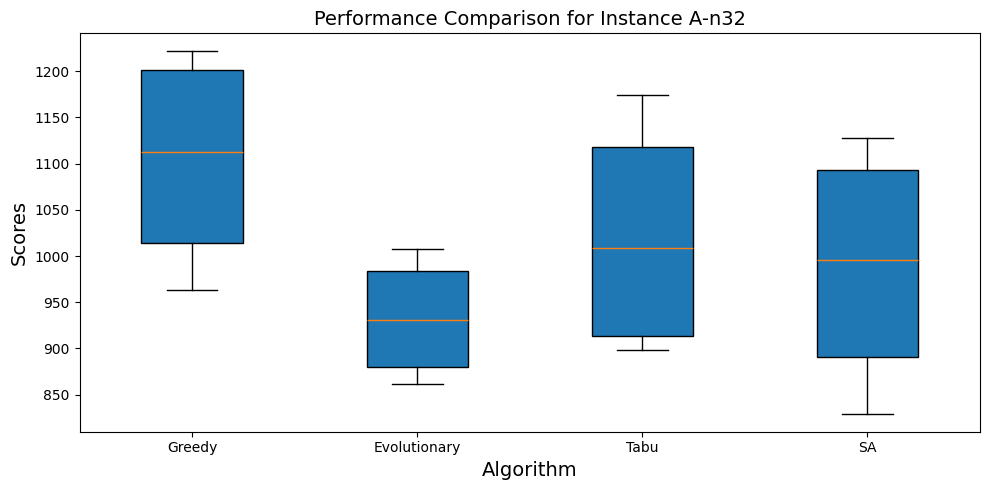

/tmp/ipykernel_351/2624086433.py:34: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(plot_data, labels=algorithms, patch_artist=True)


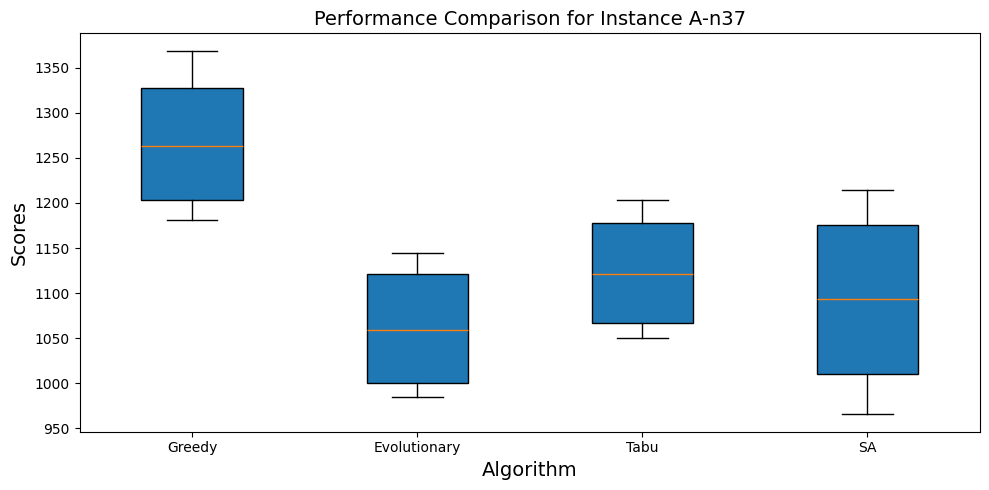

/tmp/ipykernel_351/2624086433.py:34: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(plot_data, labels=algorithms, patch_artist=True)


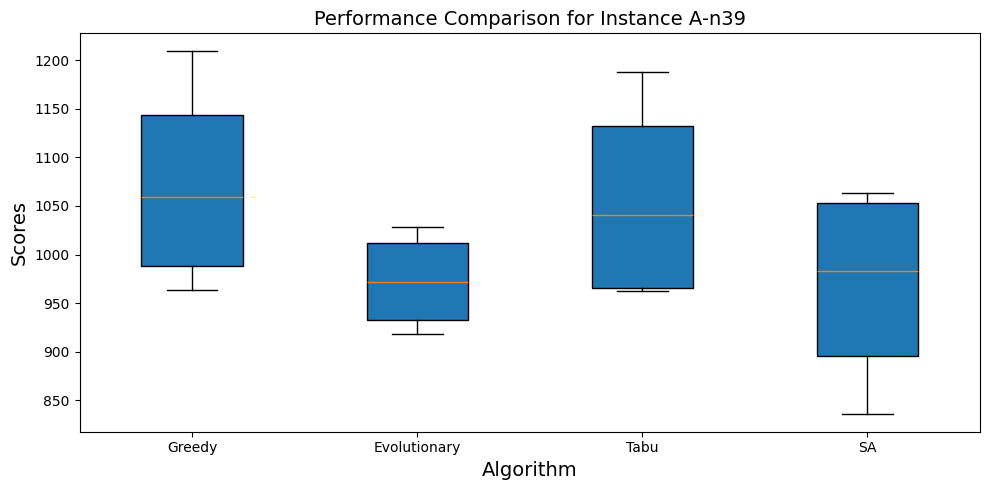

/tmp/ipykernel_351/2624086433.py:34: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(plot_data, labels=algorithms, patch_artist=True)


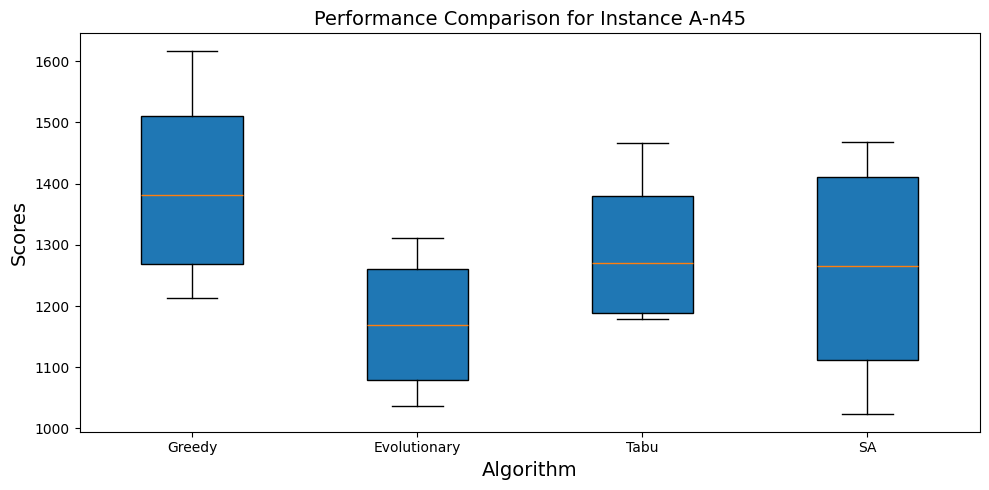

/tmp/ipykernel_351/2624086433.py:34: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(plot_data, labels=algorithms, patch_artist=True)


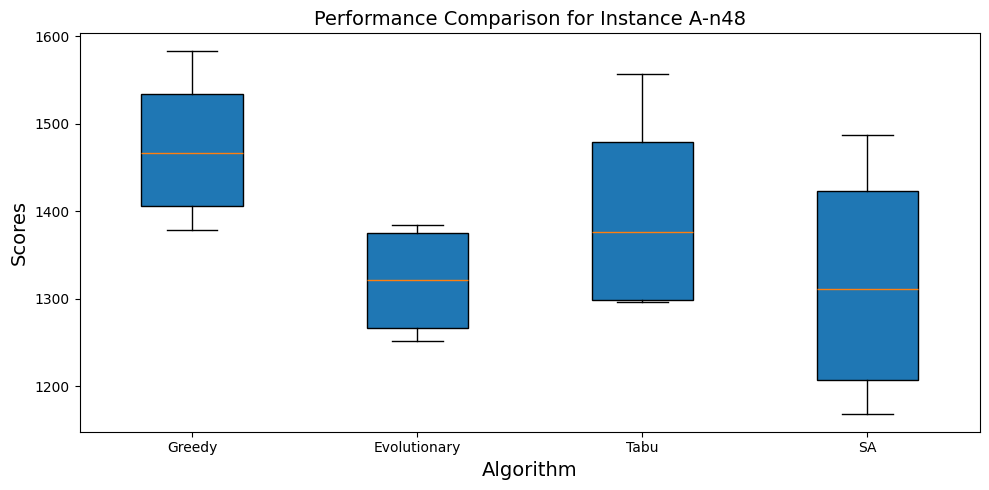

/tmp/ipykernel_351/2624086433.py:34: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(plot_data, labels=algorithms, patch_artist=True)


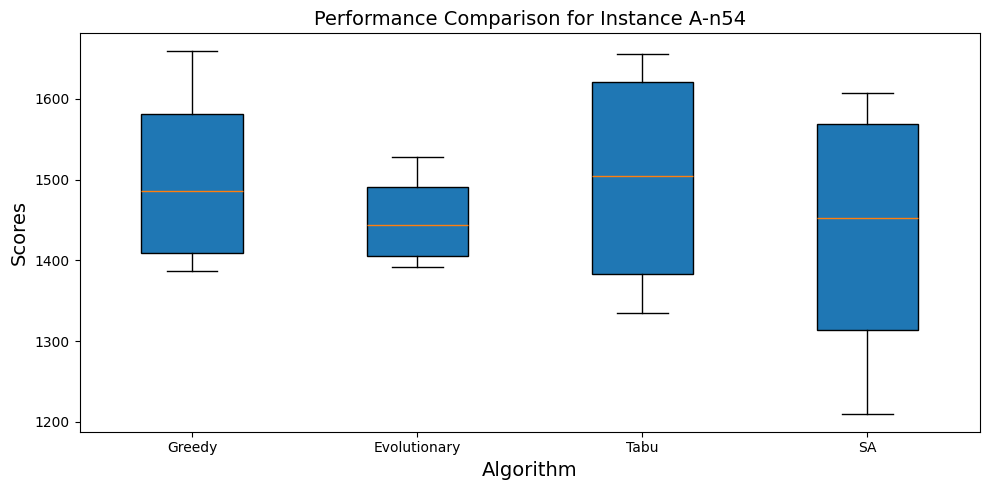

/tmp/ipykernel_351/2624086433.py:34: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(plot_data, labels=algorithms, patch_artist=True)


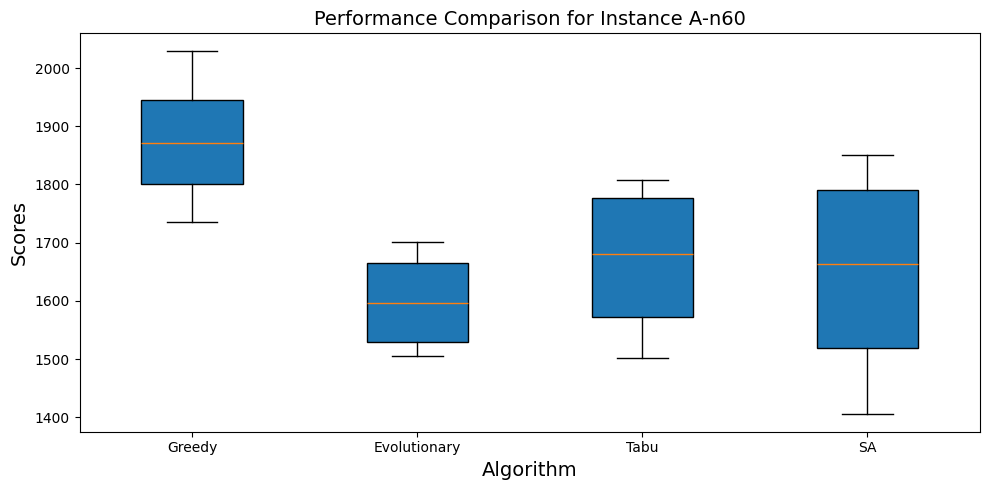

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from a CSV file
df = pd.read_csv('comparisons-sa.csv', sep=";")

# Set the instance number as the index
df.set_index('Instance', inplace=True)

# Define algorithms
#algorithms = ['Random', 'Greedy', 'Evolutionary', 'Tabu', 'SA']
algorithms = ['Greedy', 'Evolutionary', 'Tabu', 'SA']


# Loop through each instance and create a separate box plot
for index, row in df.iterrows():
    # Prepare data for the current instance
    plot_data = []

    for algo in algorithms:
        # Extract relevant metrics for the algorithm
        best = row[f"{algo}: best"]
        worst = row[f"{algo}: worst"]
        avg = row[f"{algo}: avg"]
        std = row[f"{algo}: std"]
        
        # Generate synthetic data for box plot visualization
        # Assuming normal distribution with mean=avg and std=std
        synthetic_data = [best, worst] + [avg + std, avg - std]
        plot_data.append(synthetic_data)

    # Create the box plot
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.boxplot(plot_data, labels=algorithms, patch_artist=True)

    # Customize the plot
    ax.set_title(f'Performance Comparison for Instance {index.split("/")[-1][:-3]}', fontsize=14)
    ax.set_ylabel('Scores', fontsize=14)
    ax.set_xlabel('Algorithm', fontsize=14)
    plt.xticks(rotation=0)

    # Show the plot
    plt.tight_layout()
    plt.show()